In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "../processed/train/paraphrase_humarin_samples_32_EVALUATED_19_11_23.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
kgw_wm_zscore = df["kgw-wm-zscore"]
kgw_wm_pp_zscore = df["kgw-wm-pp-zscore"]

In [6]:
# kthl_wm_zscore = df["kthl-wm-zscore"]
# kthl_wm_pp_zscore = df["kthl-wm-pp-zscore"]

In [7]:
np_kgw = np.array(kgw_wm_zscore)
np_kgw_pp = np.array(kgw_wm_pp_zscore)
# np_kthl = np.array(kthl_wm_zscore)
# np_kthl_pp = np.array(kthl_wm_pp_zscore)

In [8]:
def comparison(arr_1, arr_2):
    arr_1_mean = arr_1.mean()
    arr_2_mean = arr_2.mean()
    
    arr_1_std = arr_1.std()
    arr_2_std = arr_2.std()
    
    print(f"base mean: {arr_1_mean:.4f}, pp mean: {arr_2_mean:.4f}")
    print(f"base std: {arr_1_std:.4f}, pp mean: {arr_2_std:.4f}")

In [9]:
comparison(np_kgw, np_kgw_pp)

base mean: 21.0615, pp mean: 2.7858
base std: 4.4884, pp mean: 2.4335


In [10]:
# comparison(np_kthl, np_kthl_pp)

Object `comparison(np_kthl, np_kthl_pp)` not found.


In [11]:
image_path = "../results/images/z_score_comparisons_october/"

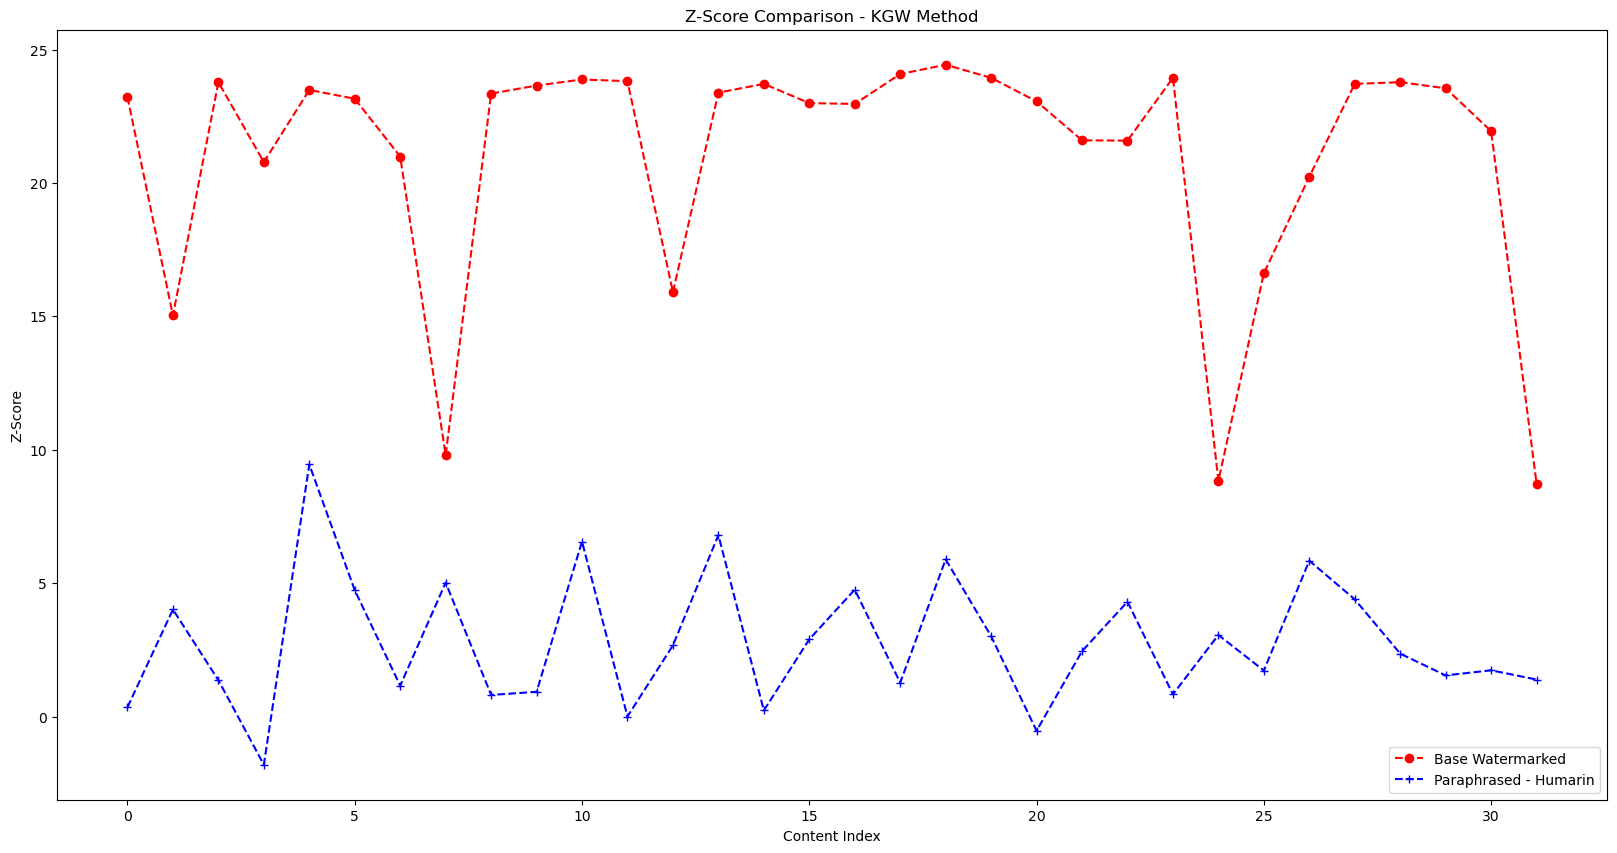

In [14]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(kgw_wm_zscore))), kgw_wm_zscore, label="Base Watermarked", color='red', marker='o', linestyle="dashed")
axs.plot(list(range(len(kgw_wm_pp_zscore))), kgw_wm_pp_zscore, label="Paraphrased - Humarin", color='blue', marker='+', linestyle="dashed")

axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - KGW Method")
axs.legend()
# plt.savefig(image_path+"kgw_zscore.png")
plt.show()

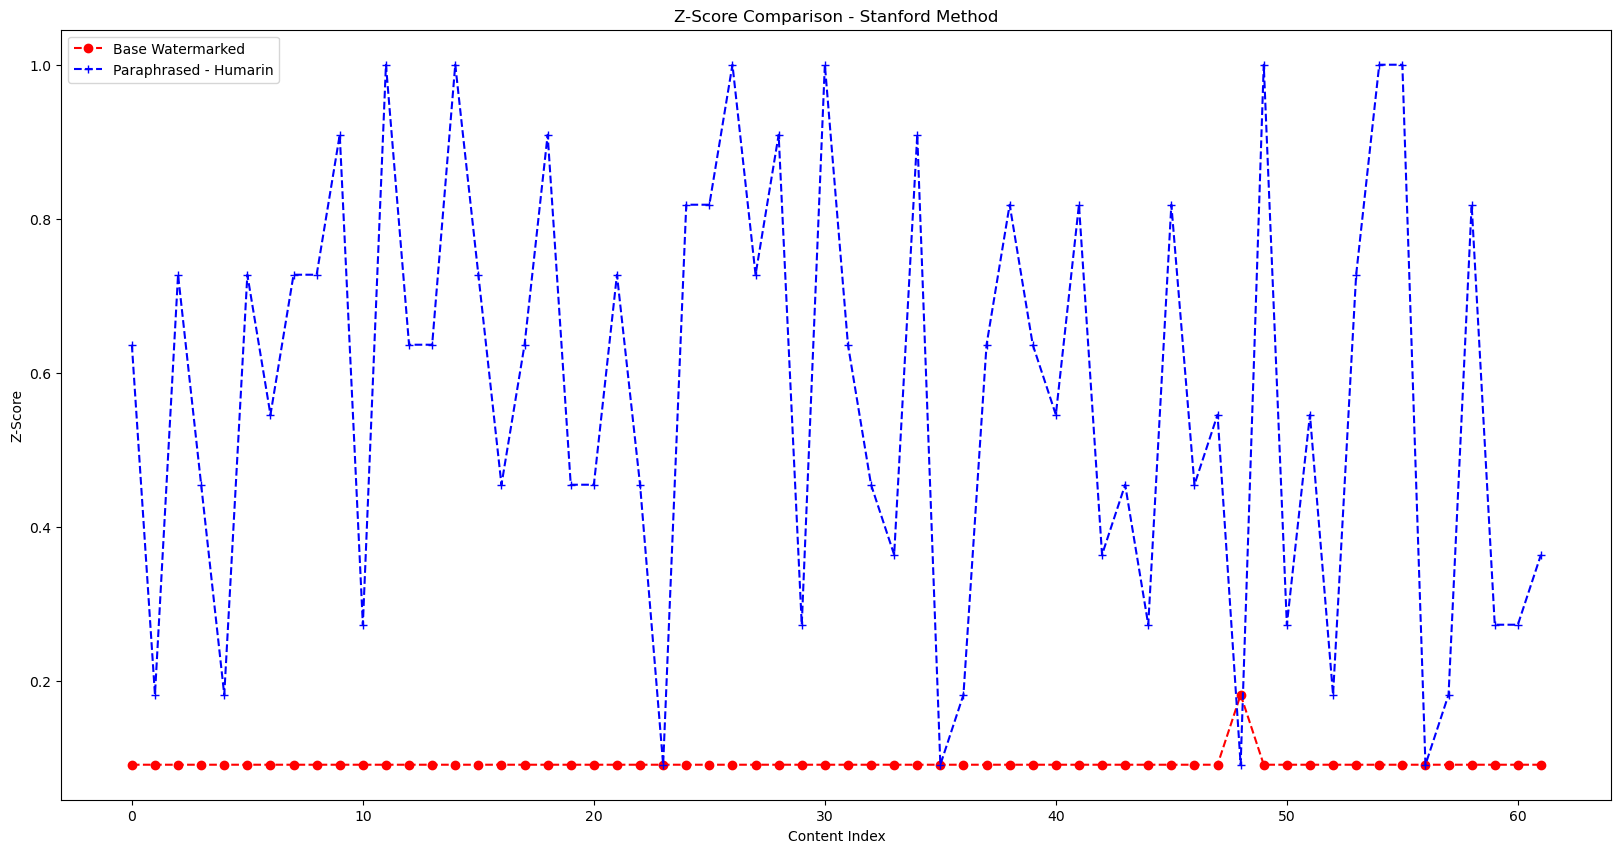

In [26]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(kthl_wm_pscore))), kthl_wm_pscore, label="Base Watermarked", color='red', marker='o', linestyle="dashed")
axs.plot(list(range(len(kthl_wm_pp_pscore))), kthl_wm_pp_pscore, label="Paraphrased - Humarin", color='blue', marker='+', linestyle="dashed")

axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - Stanford Method")
axs.legend()
# plt.savefig(image_path+"kthl.png")
plt.show()